In [40]:
import pickle

# Path to your pickle file
pickle_path = "E:/UT/Term8/LLM/LLMs-For-Rational-Trading/result_df.pkl"

# Load the pickle file
with open(pickle_path, "rb") as f:
    df = pickle.load(f)


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
df = df.dropna()
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")
df["day_of_week"] = df["date"].dt.day_name()
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])

# Calculate daily profit/loss based on decision
def calc_profit(row):
    if row["final_decision"] == 1:  # sell
        return row["open"] - row["close"]
    elif row["final_decision"] == 2:  # buy
        return row["close"] - row["open"]
    else:
        return 0

df["profit"] = df.apply(calc_profit, axis=1)

# Final total profit
final_profit = df["profit"].sum()
mean_profit = df["profit"].mean()
print(f"Final Total Profit: {final_profit}")
print(f"Final Mean Profit: {mean_profit}")

# Monthly profit & decision counts
monthly_stats = df.groupby("month").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

# Weekday vs weekend profit & decision counts
week_part_stats = df.groupby("is_weekend").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

# Day of week profit & decision counts
dow_stats = df.groupby("day_of_week").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

print("\nMonthly Stats:\n", monthly_stats)
print("\nWeekday vs Weekend Stats:\n", week_part_stats)
print("\nDay of Week Stats:\n", dow_stats)


Final Total Profit: 302.999755859375
Final Mean Profit: 4.267602195202465

Monthly Stats:
          total_profit  decision_count  buy_count  sell_count  wait_count
month                                                                   
2025-04    -75.400146               9          2           2           4
2025-05    178.399902              21          4           7           8
2025-06    133.500000              20         11           0           7
2025-07     66.500000              21          5           4          10

Weekday vs Weekend Stats:
             total_profit  decision_count  buy_count  sell_count  wait_count
is_weekend                                                                 
False         302.999756              71         22          13          29

Day of Week Stats:
              total_profit  decision_count  buy_count  sell_count  wait_count
day_of_week                                                                 
Friday          55.599854              1

In [42]:
# Calculate counts of each decision
decision_counts = df["final_decision"].value_counts().sort_index()
buy_count = decision_counts.get(2, 0)
sell_count = decision_counts.get(1, 0)
wait_count = decision_counts.get(0, 0)

# Calculate total profit for each decision type
buy_profit = df.loc[df["final_decision"] == 2, "profit"].sum()
sell_profit = df.loc[df["final_decision"] == 1, "profit"].sum()
wait_profit = df.loc[df["final_decision"] == 0, "profit"].sum()

# Calculate total profit overall
total_profit = df["profit"].sum()

print(f"Buy decisions: {buy_count}, Total Buy Profit: {buy_profit}")
print(f"Sell decisions: {sell_count}, Total Sell Profit: {sell_profit}")
print(f"Wait decisions: {wait_count}, Total Wait Profit: {wait_profit}")
print(f"Overall Total Profit: {total_profit}")


Buy decisions: 22, Total Buy Profit: 167.900146484375
Sell decisions: 13, Total Sell Profit: 135.099609375
Wait decisions: 29, Total Wait Profit: 0.0
Overall Total Profit: 302.999755859375


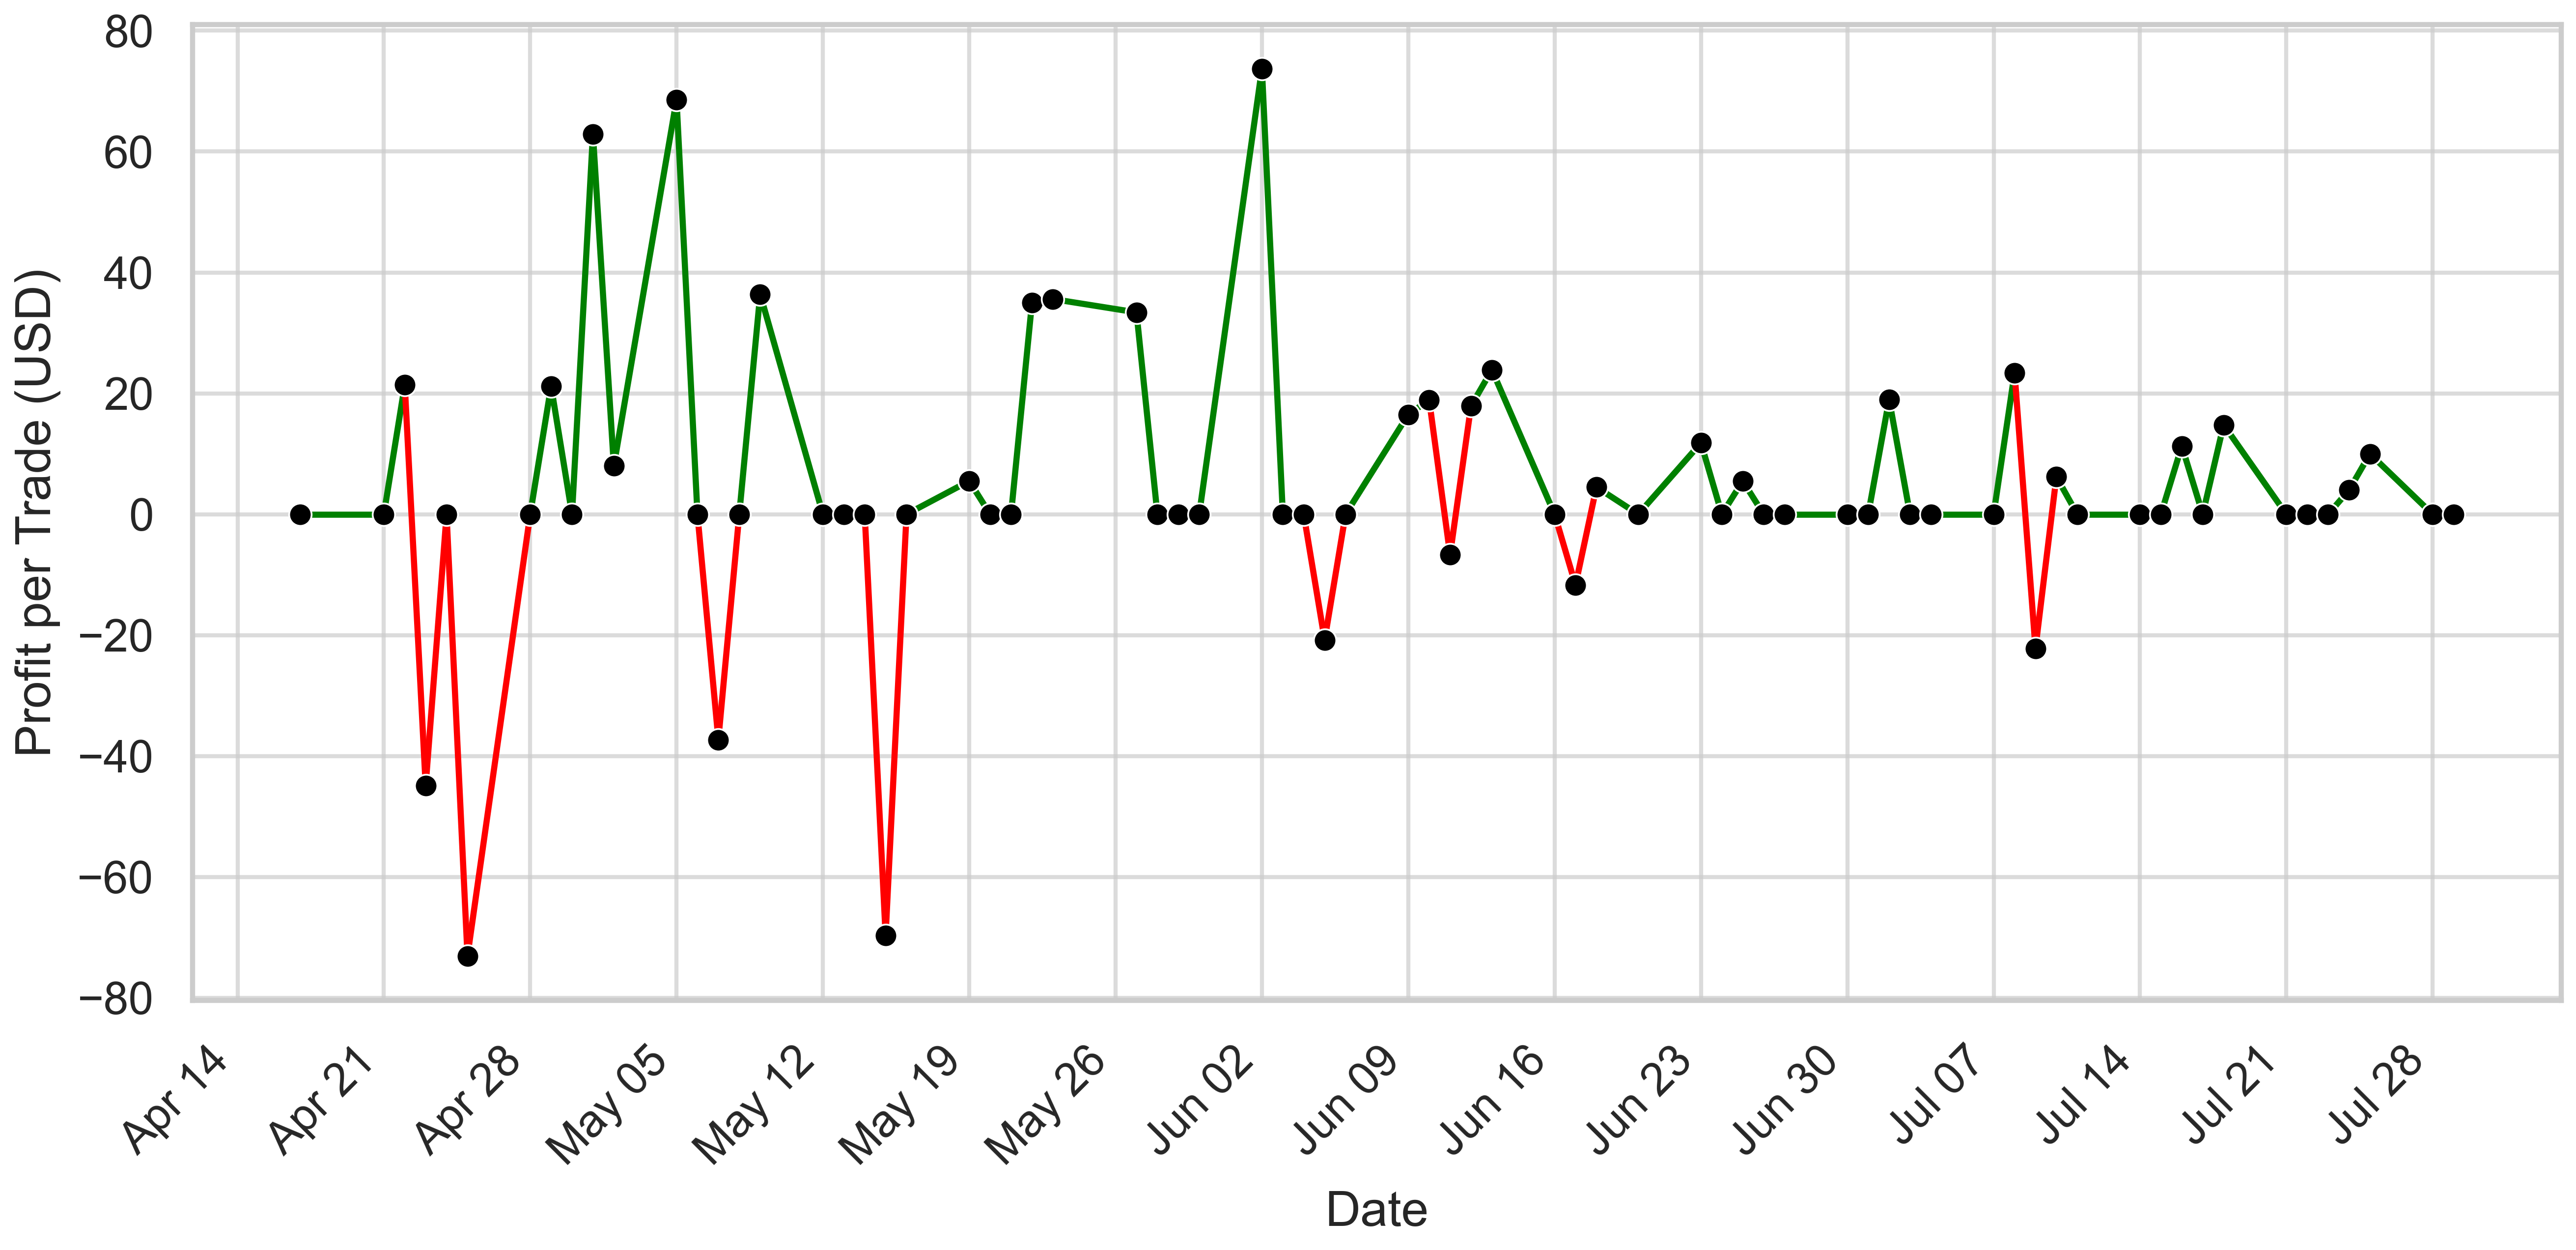

Number of samples plotted: 71


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.collections import LineCollection

plt.rcParams['text.usetex'] = False  # Disable LaTeX

df["date"] = pd.to_datetime(df["date"])
dates = mdates.date2num(df["date"])
profits = df["profit"].values

fig, ax = plt.subplots(figsize=(9, 4.5))

# Create segments for LineCollection
points = np.array([dates, profits]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Color segments red if either endpoint below zero, else green
colors = ['red' if (p0 < 0 or p1 < 0) else 'green' for p0, p1 in zip(profits[:-1], profits[1:])]

# Add colored line segments
lc = LineCollection(segments, colors=colors, linewidth=1.5)
ax.add_collection(lc)

# Seaborn scatter plot of points (black dots)
sns.scatterplot(data=df, x="date", y="profit", color='black', s=30, ax=ax, legend=False, zorder=5)

# Horizontal zero line
# ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Date ticks formatting
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Labels
ax.set_xlabel("Date")
ax.set_ylabel("Profit per Trade (USD)")

# ax.set_xlim(dates.min(), dates.max())
# ax.set_ylim(profits.min() * 1.1, profits.max() * 1.1)

plt.tight_layout()
plt.show()

print(f"Number of samples plotted: {len(df)}")


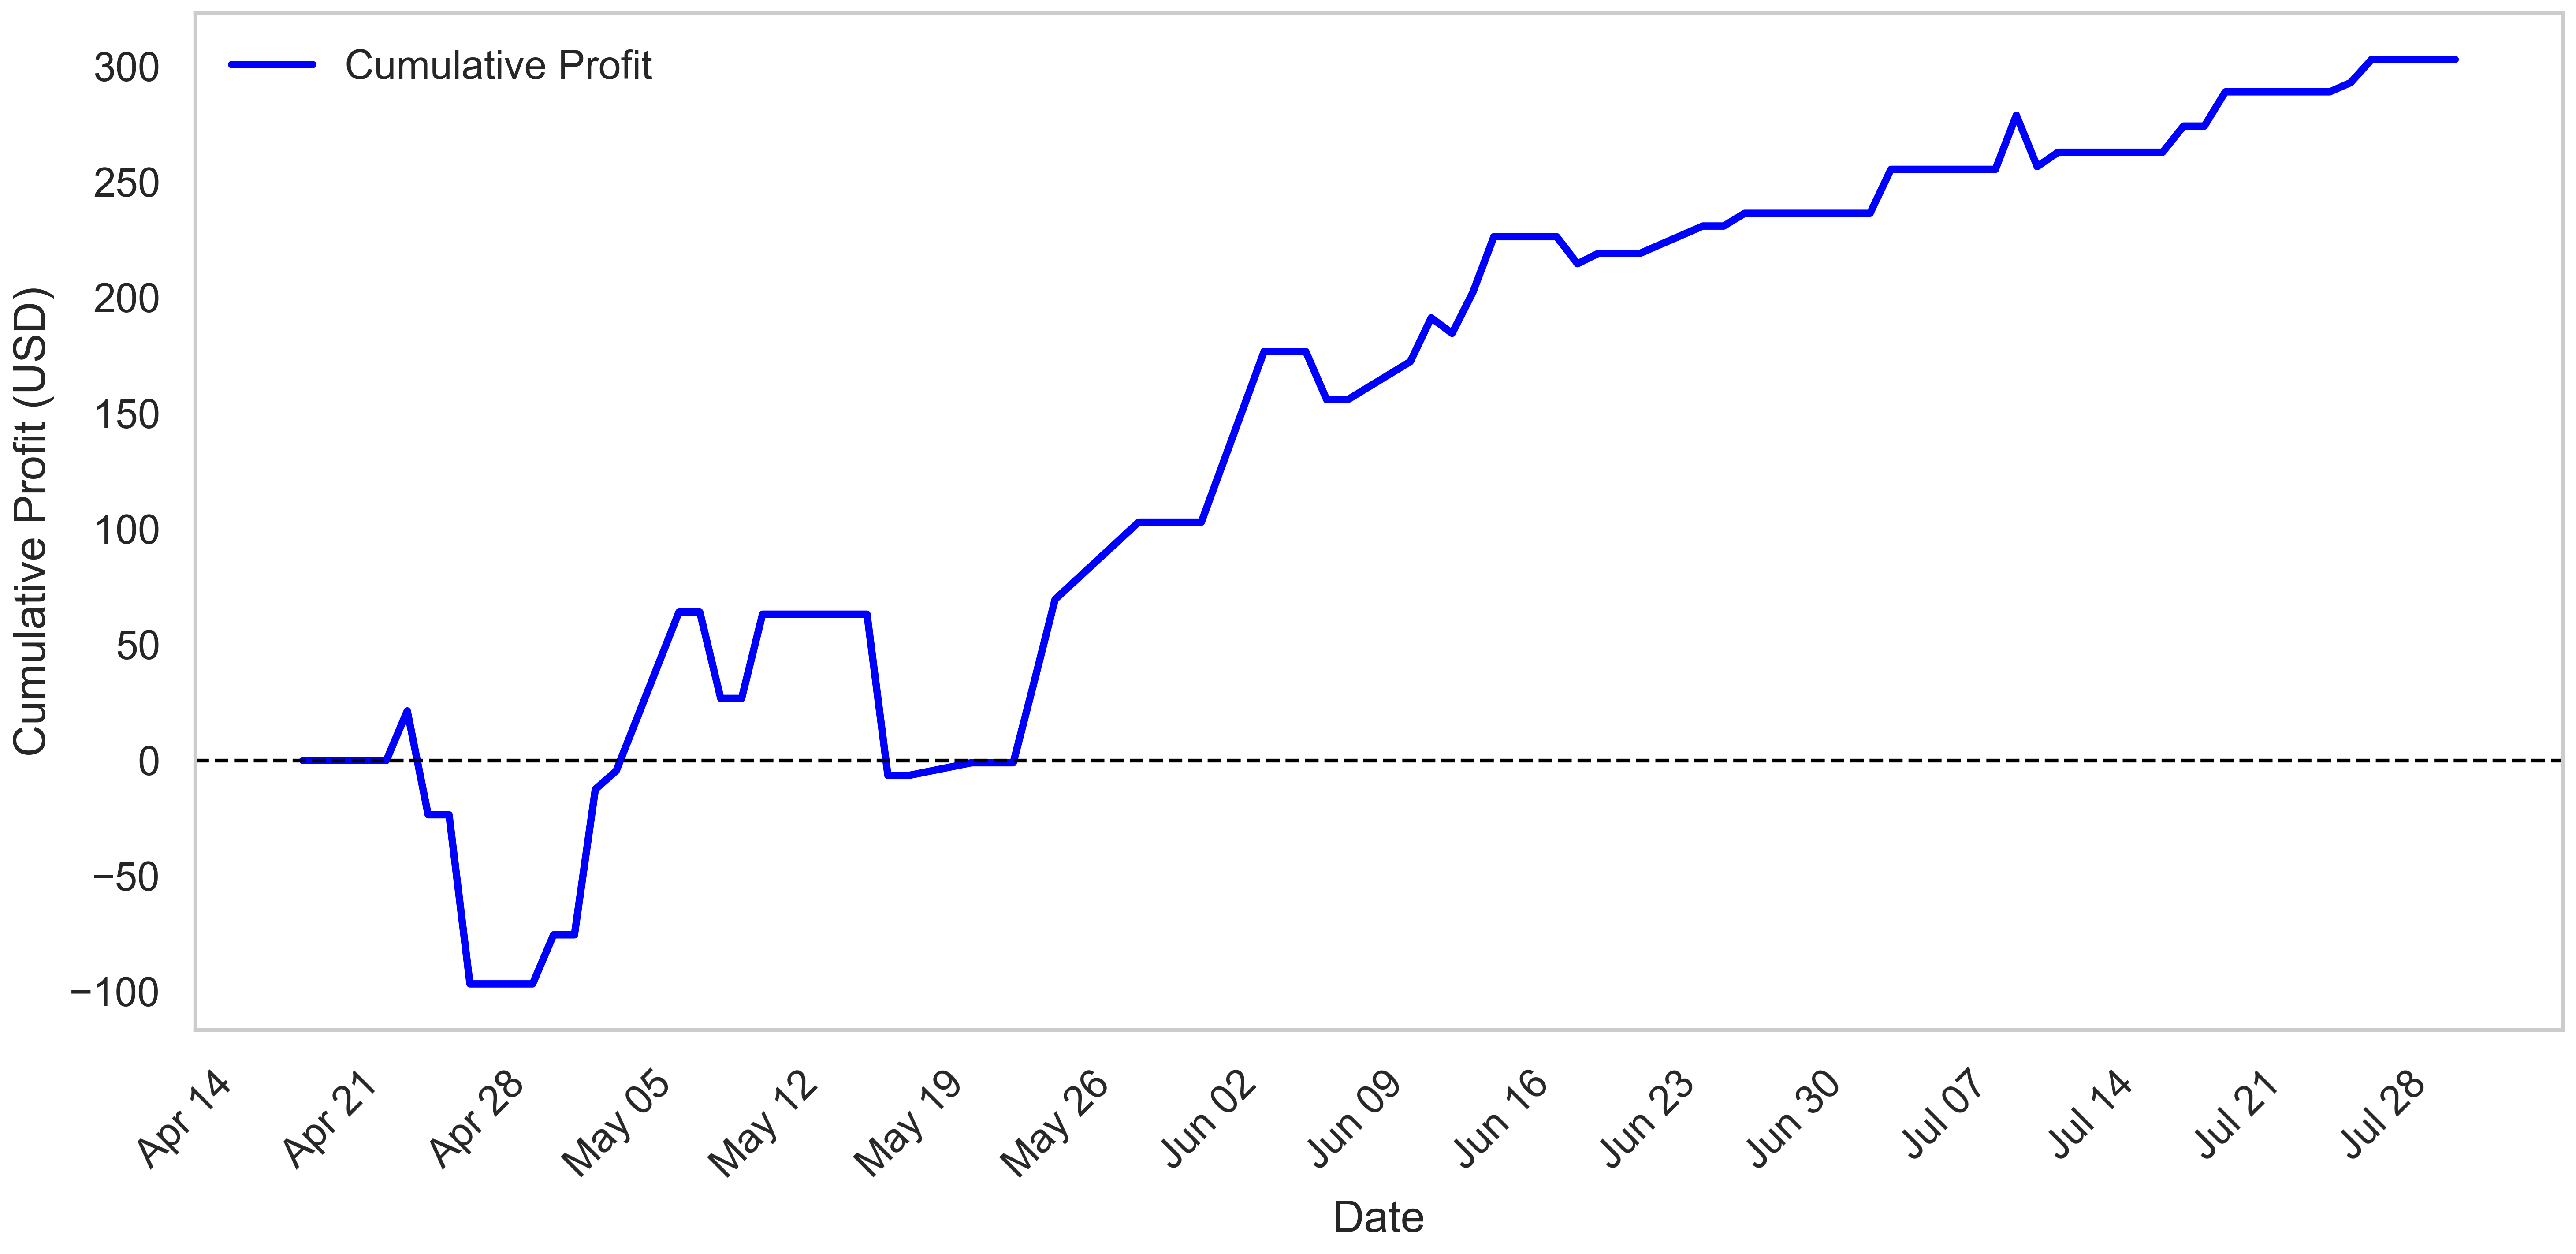

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and already has 'date' and 'profit' columns
df["date"] = pd.to_datetime(df["date"])
df["cumulative_profit"] = np.cumsum(df["profit"])

sns.set(style="whitegrid")  # You can choose other seaborn styles

fig, ax = plt.subplots(figsize=(10, 5))

# Plot cumulative profit with seaborn lineplot
sns.lineplot(data=df, x="date", y="cumulative_profit", ax=ax, color='blue', linewidth=2, label='Cumulative Profit')

# Horizontal line at y=0 (like your dashed line)
ax.axhline(0, color='black', linestyle='--', linewidth=1)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Cumulative Profit (USD)", fontsize=12)

# Formatting x-axis date ticks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Remove grid if you want (or keep it if you like seaborn grid)
ax.grid(False)

# Show axis spines with linewidth 1
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

# Remove top and right ticks
ax.tick_params(top=False, right=False)

plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16940\385580570.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df.groupby(pd.Grouper(key='date', freq='M'))['profit'].sum()


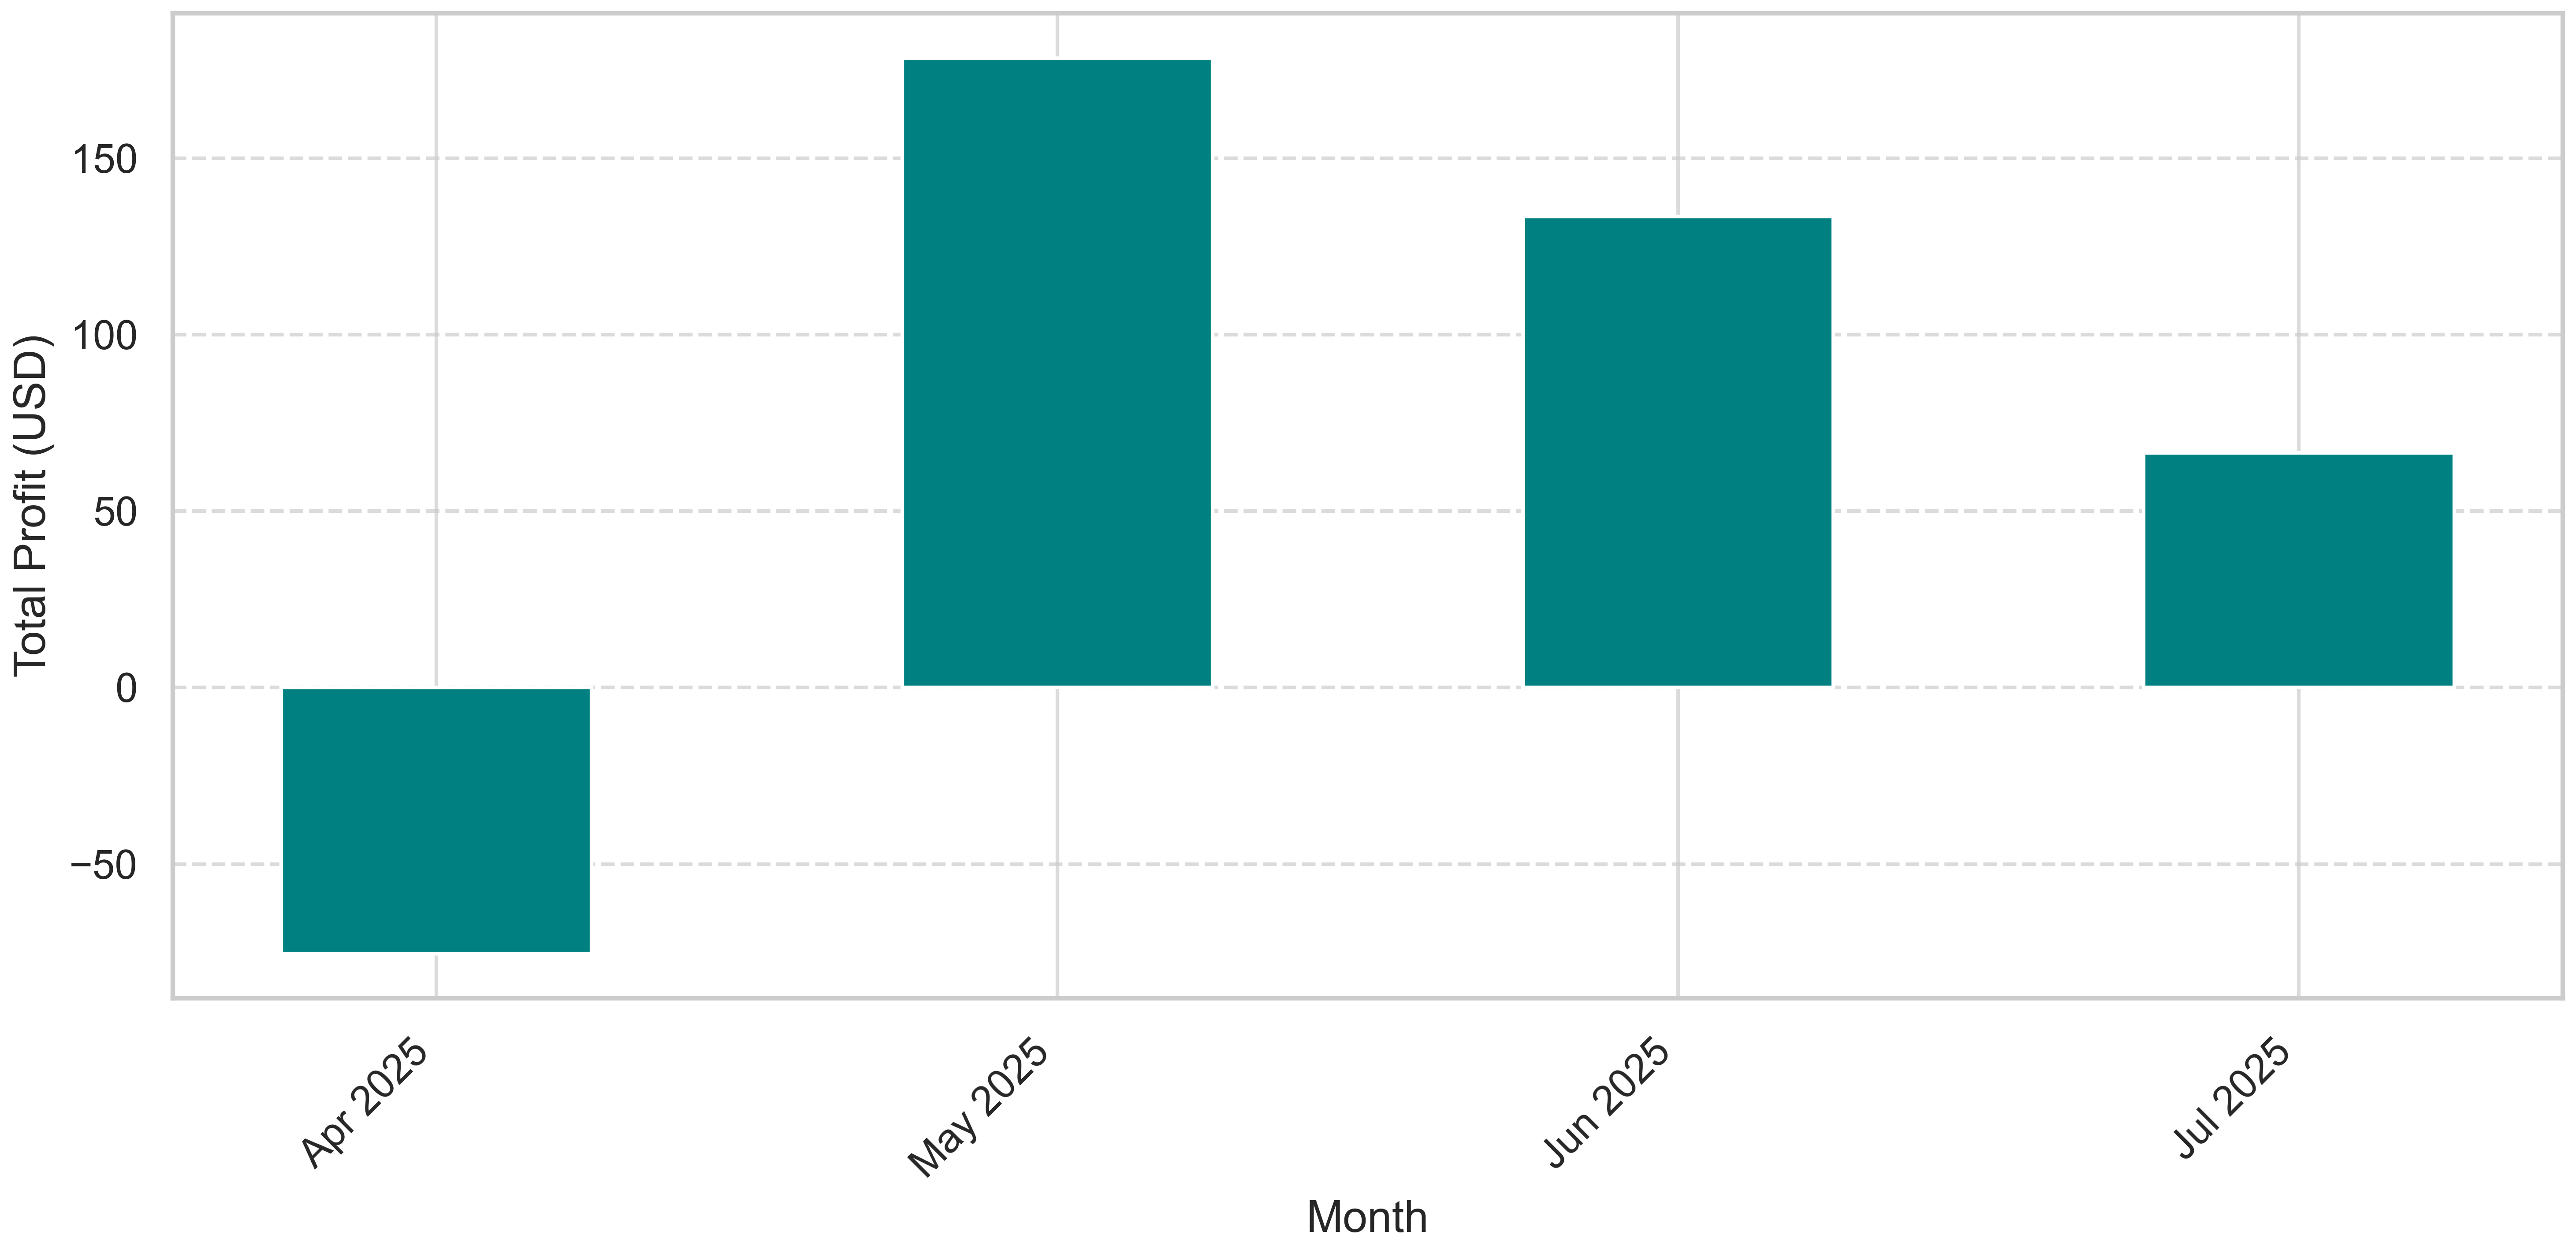

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df['date'] = pd.to_datetime(df['date'])
monthly_profit = df.groupby(pd.Grouper(key='date', freq='M'))['profit'].sum()

fig, ax = plt.subplots(figsize=(10, 5))

# Create x positions as a numpy array with no gaps between bars
x = np.arange(len(monthly_profit))

# Plot bars with width=1 (full width), so bars touch each other
ax.bar(x, monthly_profit.values, color='teal', width=0.5)

# Set x-axis labels to month-year strings
ax.set_xticks(x)
ax.set_xticklabels([d.strftime('%b %Y') for d in monthly_profit.index], rotation=45, ha='right')

ax.set_xlabel('Month')
ax.set_ylabel('Total Profit (USD)')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
